# A Simple Momentum Strategy

Also called as a trend-following strategy

In [778]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

Using the gold etf to obtain the data

In [779]:
tsla = yf.download('TSLA', start='2020-01-01', end='2025-01-01', interval='1d')
day = np.arange(1, len(tsla) + 1)
tsla['Day'] = day
tsla.drop(columns=['Volume'], inplace=True)
tsla = tsla[['Day', 'Open', 'High', 'Low', 'Close']]
tsla.head()

/tmp/ipython-input-307513209.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla = yf.download('TSLA', start='2020-01-01', end='2025-01-01', interval='1d')
[*********************100%***********************]  1 of 1 completed


Price,Day,Open,High,Low,Close
Ticker,,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,1,28.299999,28.713333,28.114000,28.684000
2020-01-03,2,29.366667,30.266666,29.128000,29.534000
2020-01-06,3,29.364668,30.104000,29.333332,30.102667
2020-01-07,4,30.760000,31.441999,30.224001,31.270666
2020-01-08,5,31.580000,33.232666,31.215334,32.809334


Adding Moving Average to our DataFrame

In [780]:
tsla['9-day'] = tsla['Close'].rolling(9).mean().shift()
tsla['21-day'] = tsla['Close'].rolling(21).mean().shift()
tsla[19:25]

Price,Day,Open,High,Low,Close,9-day,21-day
Ticker,,TSLA,TSLA,TSLA,TSLA,,
Date,,,,,,,
2020-01-30,20,42.161331,43.391998,41.200001,42.720669,36.916148,NaN
2020-01-31,21,42.666668,43.533333,42.167999,43.371334,37.859259,NaN
2020-02-03,22,44.912666,52.409332,44.901333,52.000000,38.896815,35.243936
2020-02-04,23,58.863998,64.599335,55.591999,59.137333,40.621259,36.354222
2020-02-05,24,54.883999,56.398666,46.940666,48.980000,42.973111,37.763905
2020-02-06,25,46.661331,53.055332,45.799999,49.930668,44.176815,38.662825


Adding Signal Collumn

In [781]:
tsla['signal'] = np.where(tsla['9-day'] > tsla['21-day'], 1, 0)
tsla['signal'] = np.where(tsla['9-day'] < tsla['21-day'], -1, tsla['signal'])
tsla.dropna(inplace=True)
tsla.head()

Price,Day,Open,High,Low,Close,9-day,21-day,signal
Ticker,,TSLA,TSLA,TSLA,TSLA,,,
Date,,,,,,,,
2020-02-03,22,44.912666,52.409332,44.901333,52.000000,38.896815,35.243936,1
2020-02-04,23,58.863998,64.599335,55.591999,59.137333,40.621259,36.354222,1
2020-02-05,24,54.883999,56.398666,46.940666,48.980000,42.973111,37.763905,1
2020-02-06,25,46.661331,53.055332,45.799999,49.930668,44.176815,38.662825,1
2020-02-07,26,48.703335,51.316666,48.666668,49.871334,45.540815,39.551397,1


In [782]:
tsla['return'] = np.log(tsla['Close']).diff()
tsla['system_return'] = tsla['signal'] * tsla['return']
tsla['entry'] = tsla['signal'].diff()
tsla.head()

Price,Day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Ticker,,TSLA,TSLA,TSLA,TSLA,,,,,,
Date,,,,,,,,,,,
2020-02-03,22,44.912666,52.409332,44.901333,52.000000,38.896815,35.243936,1,NaN,NaN,NaN
2020-02-04,23,58.863998,64.599335,55.591999,59.137333,40.621259,36.354222,1,0.128619,0.128619,0.0
2020-02-05,24,54.883999,56.398666,46.940666,48.980000,42.973111,37.763905,1,-0.188450,-0.188450,0.0
2020-02-06,25,46.661331,53.055332,45.799999,49.930668,44.176815,38.662825,1,0.019223,0.019223,0.0
2020-02-07,26,48.703335,51.316666,48.666668,49.871334,45.540815,39.551397,1,-0.001189,-0.001189,0.0


Plotting Trades

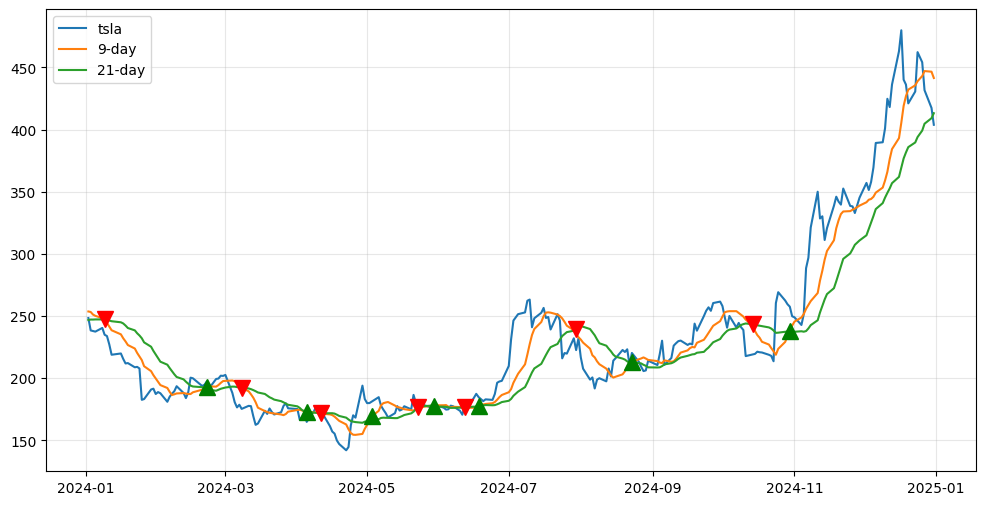

In [783]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(tsla.iloc[-252:]['Close'], label = 'tsla')
plt.plot(tsla.iloc[-252:]['9-day'], label = '9-day')
plt.plot(tsla.iloc[-252:]['21-day'], label = '21-day')
plt.plot(tsla[-252:].loc[tsla.entry == 2].index, tsla[-252:]['9-day'][tsla.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(tsla[-252:].loc[tsla.entry == -2].index, tsla[-252:]['21-day'][tsla.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

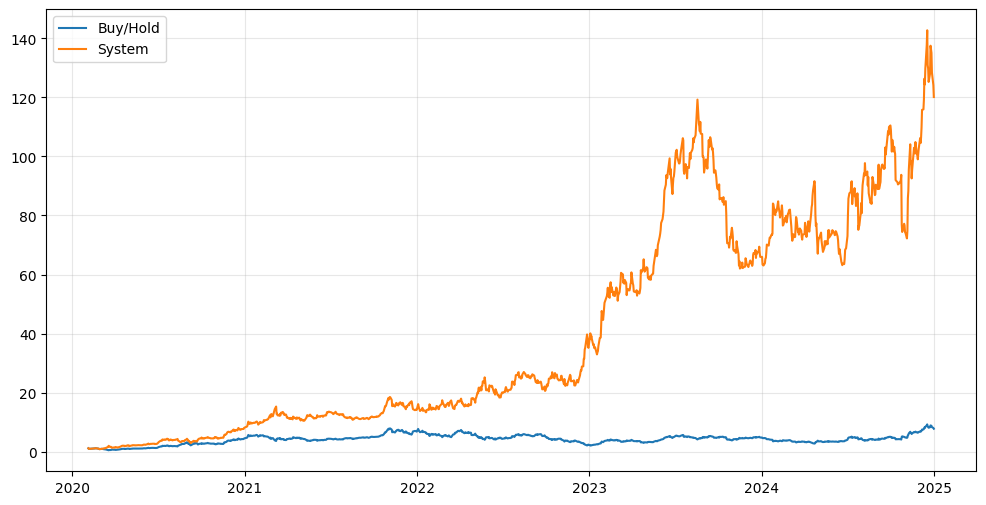

In [784]:
plt.plot(np.exp(tsla['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(tsla['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [785]:
buy_hold_return = np.exp(tsla['return']).cumprod().iloc[-1] - 1
print(f'Buy/Hold Return: {buy_hold_return:.4f}')
system_return = np.exp(tsla['system_return']).cumprod().iloc[-1] - 1
print(f'System Return: {system_return:.4f}')
sharpe_ratio = (tsla['system_return'].mean() / tsla['system_return'].std()) * np.sqrt(252)
print(f'Sharpe Ratio: {sharpe_ratio:.4f}')
cumulative_returns = (1 + tsla['system_return']).cumprod()
peak = cumulative_returns.expanding(min_periods=1).max()
drawdown = (cumulative_returns / peak) - 1
max_drawdown = drawdown.min()
print(f'Maximum Drawdown: {max_drawdown:.4f}')

Buy/Hold Return: 6.7662
System Return: 119.1275
Sharpe Ratio: 1.4714
Maximum Drawdown: -0.5253
